In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# EDA

In [9]:
train.head(10)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
5,5,30300,36,0,0,35,19069,8,4,1998,1,0,8181,1826,589,0,0,3033117.8
6,6,19341,95,1,0,37,23939,9,6,2017,0,0,7173,9233,101,0,3,1944096.7
7,7,58110,3,1,0,1,67658,8,4,2003,1,0,3164,3389,499,1,5,5814953.3
8,8,20537,84,0,1,44,9560,3,10,1994,0,0,5026,7669,191,0,9,2056267.4
9,9,89396,35,1,1,96,33928,6,7,1993,0,0,7936,2956,414,0,1,8949480.3


In [10]:
train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [5]:
train.duplicated().sum()

0

In [6]:
test.duplicated().sum()

0

### No missing values or duplicates to handle

In [7]:
#FUNCTION TO DETECT OUTLIERS
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percent = (outliers.shape[0] / data.shape[0]) * 100
        outlier_percents[column] = outlier_percent
        
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')


detect_outliers(train)

,Outlier_percentage
id,0.000000
hasStorageRoom,0.000000
hasStormProtector,0.000000
isNewBuilt,0.000000
hasGuestRoom,0.000000
cityPartRange,0.000000
numPrevOwners,0.000000
hasPool,0.000000
hasYard,0.000000
numberOfRooms,0.000000


In [8]:
def outlier_removal(data , i):
    q1 = np.quantile(data[i] ,0.25)
    q3 = np.quantile(data[i] , 0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    data.drop(data[data[i]> upper_tail].index , inplace = True)
    data.drop(data[data[i]< lower_tail].index ,inplace =True)
    
outlier_list = ['squareMeters' ,'floors','garage' ,'basement' ,'made' ,'cityCode' ,'attic']
for  i in outlier_list:
    outlier_removal(train ,i)

### Outliers removed on train data

In [ ]:
feat_numerical = ['squareMeters', 'numberOfRooms', 'floors', 'numPrevOwners', 'basement', 'attic', 'garage',]

In [ ]:
feat_categorical = ['hasYard', 'hasPool', 'cityCode', 'cityPartRange', 'made', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom', 'hasGuestRoom']

In [ ]:
train.drop(columns=['id', 'price', 'cityCode'])

In [12]:
train['made'].nunique()

32

In [22]:
train['made'].min()

1990

In [24]:
train['made'].max() 

2021

In [25]:
train['made'].mean()

2006.244714587738

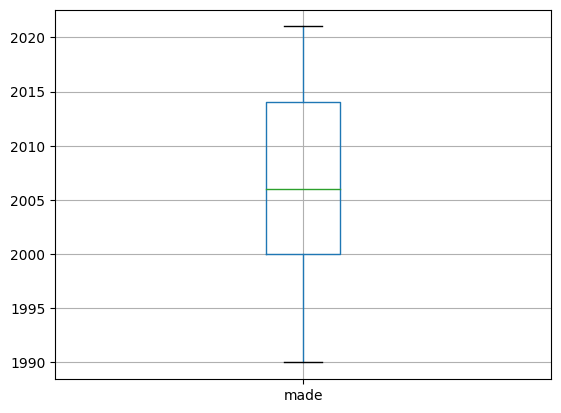

In [26]:
train[['made']].boxplot();

In [32]:
train['made_category'] = pd.cut(x = train['made'],
                                 bins=[train['made'].min()-1,
                                       train['made'] <= 2000,
                                       train['made'].mean(),
                                       train['made'] >= 2014,
                                       train['made'].max()+1], 
                                 labels=['really_old', 'old', 'new', 'bran_new'])

train.head(10)

ValueError: setting an array element with a sequence.